<img src="mioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura: Data preprocessing</center>

# Challenge S3: Preguntas sobre AirBnB

## Objetivos

El objetivo de este challenge es reponder algunas preguntas sobre un dataset real de AirBnb.

## Configuración del entorno

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Carga de los datos
Como en otras ocasiones cargaremos los datos de un fichero csv.

In [2]:
df = pd.read_csv('dataset_airbnb_madrid.csv')

Una vez cargados los datos debemos inspeccionarlos, antes de empezar nuestro análisis.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13335 entries, 0 to 13334
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                13335 non-null  int64  
 1   listing_url                       13335 non-null  object 
 2   scrape_id                         13335 non-null  int64  
 3   last_scraped                      13335 non-null  object 
 4   name                              13335 non-null  object 
 5   summary                           12846 non-null  object 
 6   space                             9700 non-null   object 
 7   description                       13329 non-null  object 
 8   experiences_offered               13335 non-null  object 
 9   neighborhood_overview             8308 non-null   object 
 10  notes                             5037 non-null   object 
 11  transit                           8264 non-null   object 
 12  acce

In [4]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,7830063,https://www.airbnb.com/rooms/7830063,20170407214119,2017-04-08,Quiet room in Plaza Mayor,Room in magnificent property in the historic c...,"Based in the historic center of Madrid, to 1 m...",Room in magnificent property in the historic c...,none,"In the historic heart of Madrid, near the Plaz...",...,9.0,t,NaN,NaN,t,moderate,f,f,7,5.04
1,9898596,https://www.airbnb.com/rooms/9898596,20170407214119,2017-04-08,Homely apartment in the heart of Madrid,"Spacious apartment for up to 10 people, with a...",This spacious apartment is located in the cent...,"Spacious apartment for up to 10 people, with a...",none,The Living Santa Ana Apartments are located in...,...,9.0,t,NaN,NaN,t,moderate,f,f,1,4.39
2,15334645,https://www.airbnb.com/rooms/15334645,20170407214119,2017-04-08,Piso Muy Luminoso en pleno centro de Madrid,"Lugares de interés: Casa Lucio, Cine Doré, Cal...",Lo mejor es su ubicación en pleno centro de Ma...,"Lugares de interés: Casa Lucio, Cine Doré, Cal...",none,La zona de la Latina es un área cultural y un ...,...,9.0,t,NaN,NaN,t,strict,f,f,1,5.57
3,1307795,https://www.airbnb.com/rooms/1307795,20170407214119,2017-04-08,Rent room in the heart of Madrid,NaN,"Very nice room , whith private bath , in a bea...","Very nice room , whith private bath , in a bea...",none,NaN,...,10.0,t,NaN,NaN,f,strict,f,f,1,0.24
4,17410608,https://www.airbnb.com/rooms/17410608,20170407214119,2017-04-08,Luxury duplex penthouse in historic building,Amazing duplex penthouse in a historic buildin...,It is located in an emblematic building with e...,Amazing duplex penthouse in a historic buildin...,none,"""Madrid de los Austrias ""is a beautiful neighb...",...,10.0,t,NaN,NaN,f,strict,f,f,13,4.29


## ¿Cuántos alojamientos tienen fotos?

In [5]:
# Tomando la columna picture_url como indicador de que tienen foto
print('El número de alojamientos con fotos es : ',
      df['picture_url'].notnull().value_counts()[True])

El número de alojamientos con fotos es :  13335


In [6]:
# Si tomamos la columna  thumbnail_url como indicador tendremos
df['thumbnail_url'].notnull().value_counts()

print('El número de alojamientos con fotos es : ',
      df['thumbnail_url'].notnull().value_counts()[True])

El número de alojamientos con fotos es :  10847


## ¿Cuál es el porcentaje de originalidad de las descripciones?.

In [7]:
porcentaje = df['description'].duplicated(
    keep=False).value_counts(normalize=True)[False]*100
print('El pocentaje de originalidad en las descripciones es : ', porcentaje, ' %')

El pocentaje de originalidad en las descripciones es :  94.66816647919009  %


## ¿Cuántos alojamientos tiene de media cada dueño?

In [8]:
print('La media de alojamientos por dueño es : {:.2f}'.format(
    df.groupby(['host_id']).size().mean()))

La media de alojamientos por dueño es : 1.63


## ¿Cuáles son los 10 dueños que más alojamientos tienen?

In [9]:
host = df.groupby(['host_id']).size().sort_values(ascending=False).head(10)
print('Los 10 dueños con mas alojamientos son \n\n {0}'.format(host))

Los 10 dueños con mas alojamientos son 

 host_id
21514948    145
15258781     97
3566146      77
54310958     67
1408525      51
27526991     48
5542111      46
21485458     44
1650712      40
32046323     39
dtype: int64


## ¿Cuántos alojamientos tiene Airbnb en Madrid?
Tip: te recomiento que borres todos los alojamientos que no estén en Madrid y luego los cuentes.

In [10]:
# Sospechamos que la columna city la palabra Madrid no está formateada de forma
# correcta o se han introducido barrios o Madrid en otros idiomas
# para ello agrupamos por la columna city par ver que posibles valores alberga
df.groupby('city').size()

city
\nDelicias                                 1
                                           3
                                           1
 Madrid                                    1
Aravaca                                    1
Aravaca (Madrid)                           1
Barcelona                                  1
Boadilla del Monte                         1
Centro                                     1
Centro, Madrid                             1
Chiva                                      1
Chueca                                     2
Chueca, Madrid                             1
Comunidad de Madrid                        1
Delicias-Madrid                            1
La Elipa                                   1
La Habana                                  1
MADRID                                     1
MADRID                                     1
Madid                                      1
Madri                                      1
Madrid                                 13191
Madri

In [11]:
# Generamos un patron de palabras que consideramos que se refieren a la ciudad de Madrid incluso en otros idiomas
pattern = '|'.join(['Madrid', 'Madid', 'Madri', 'Aravaca', 'Ventas',
                    'Villa Verde Bajo', '马德里', '馬德里', 'Centro', 'chueca', 'La Elipa', 'Delicias'])

In [12]:
# Contabilizamos los anuncios que consideramos pertenecen a la ciudad de Madrid eligiendo como
# criterio la columna city.
print('El número de anuncios de Madrid ciudad es :', df.loc[df.loc[:, 'city'].str.contains(
    pattern, case=False) == True].loc[:, 'city'].count())

El número de anuncios de Madrid ciudad es : 13309


## ¿Cuántos alojamientos requieren licencia?

In [13]:
# Basandonos en que esa información está en la columna requires_license vamos a revisar que valores
# contiene

df.groupby('requires_license').size()

requires_license
f        2
t    13333
dtype: int64

In [14]:
#Vemos que los valores que alberga son f->False->No requiere licencia y
#t->True->Si requiere licencia

df_alj_con_lic=df.loc[df.loc[:,'requires_license'].str.contains('t',case=False)==True]
num_alj_con_lic=df_alj_con_lic.loc[:,'id'].count()

print('El número de alojamientos que requieren licencia son :',num_alj_con_lic)

El número de alojamientos que requieren licencia son : 13333


## ¿Cuántos alojamientos que requieren licencia realmente la tienen?

In [15]:
# Generamos un patrón en el que consideramos que hay registrada una licencia a cualquier
# cadena que tiene un caracter alfanúmerico seguido de números. Con eso descartamos cualquier cadena
# que no indiique un código de licencia con números y letras

pattern = '\A[\w -.:]+[0-9]+'

# Basandonos en que esa información está en la columna license vamos a revisar que valores
# no son nulos o no coincide con el patron que suponemos indica un número de licencia

num_alj_con_lic_real = df_alj_con_lic.loc[(df_alj_con_lic.loc[:, 'license'].isnull() == False) & (
    df_alj_con_lic.loc[:, 'license'].str.contains(pattern, regex=True,case=False) == True)].loc[:, 'license'].count()

print('El número de alojamientos con licencia real son :', num_alj_con_lic_real)

El número de alojamientos con licencia real son : 244


## ¿Cuántos alojamientos que requieren licencia realmente no la tienen?

In [16]:
# Será la diferecnia entre los alojamientos que han marcado que necesitan licencia - los que la han aportado realmente
# Es la diferencia del apartado 1.10 menos el apartado 1.11
num_alj_con_lic_real_no = num_alj_con_lic-num_alj_con_lic_real
print('El número de alojamientos con licencia que realmente no la tienen son :',
      num_alj_con_lic_real_no)

El número de alojamientos con licencia que realmente no la tienen son : 13089


## ¿Cual es el código postal con precio medio más caro de madrid?
Tip: excluye zipcodes atípicos

* Vamos a tratar la columna ***zipcode*** para generar una dataframe con los cp de Madrid capital

In [17]:
# Generamos un patrón para detectar zipcodes con formato correcto.
# de la ciudad de Madrid que van del 28000 al 28080 según wikipedia
# Así podremos elegir los registros que cumplan un formato correcto par el posterior estudio.
#pattern = '\A[2][8][0-9]{3}\Z'
pattern = '\A[2][8][0][0-7][0-9]\Z|\A[2][8][0][8][0]\Z'

df_cp_ok = df.loc[(df.loc[:, 'zipcode'].isnull() == False) & (
    df.loc[:, 'zipcode'].str.contains(pattern, regex=True, case=False) == True)]

* Ya tenemos un dataframe con los cp de Madrid capital. Ahora para poder calcular el precio máximo por cp, debemos tratar la columna ***price*** ya es un object. Generamos una nueva columna en el que sea un float y así poder calcular el precio más caro


In [18]:
# Esta función tranforma los importes que vienen como object en floats.
# No tenemos en cuenta el primer caracter que es la divisa.
# también sustituimos la "," de los miles por "".

def transformar_importes(importe):
    if type(importe) == str:
        temp = float(importe[1:].replace(',', ''))
    else:
        temp = np.nan
    return temp


In [19]:
# Aplicamos mediante apply la transformación en float mediante la función transformar_importes
# df_cp_ok['price_float']=df_cp_ok.price.apply(transformar_importes)
# df_cp_ok.loc[:,['price','price_float']]

df_cp_ok_price = df_cp_ok.copy()
df_cp_ok_price['price_value'] = df_cp_ok_price.price.apply(transformar_importes)

precio_maximo = df_cp_ok_price.groupby('zipcode').agg(
    {'price_value': ['mean']})['price_value']['mean'].max()

cp_precio_maximo = df_cp_ok_price.groupby('zipcode').agg(
    {'price_value': ['mean']})['price_value']['mean'].idxmax()

print('El código postal de Madrid con el precio medio más caro es el {0} con un precio medio de {1} '.format(cp_precio_maximo, precio_maximo))

El código postal de Madrid con el precio medio más caro es el 28049 con un precio medio de 213.0 


## ¿En que rango se mueven los precios de los alojamientos en madrid?

In [20]:
print('El rango de la columna price va del mínimo : ', df_cp_ok_price['price_value'].min(
), ' al máximo : ', df_cp_ok_price['price_value'].max())

El rango de la columna price va del mínimo :  9.0  al máximo :  7700.0


## (extra) ¿Cuales son los factores que más afectan al precio?

* Calculamos la correlación entre las columnas númericas y que sospechamos podrían afectar al precio
* Partimos del DataFrame anterior cuyo precio ya estaba transformado en númerico.


In [21]:
df_temp_extra = df_cp_ok_price.loc[:, ['price_value', 'number_of_reviews','accommodates',
                                'bathrooms', 'bedrooms', 'beds', 'square_feet', 'minimum_nights', 'maximum_nights', 'reviews_per_month','availability_30','availability_60','availability_90','availability_365']]

df_temp_extra.corr()

,price_value,number_of_reviews,accommodates,bathrooms,bedrooms,beds,square_feet,minimum_nights,maximum_nights,reviews_per_month,availability_30,availability_60,availability_90,availability_365
price_value,1.000000,-0.036140,0.327539,0.268300,0.294455,0.352940,0.229226,0.013403,0.001858,-0.065259,0.056994,0.039172,0.024828,0.052525
number_of_reviews,-0.036140,1.000000,0.080515,-0.058997,-0.027996,0.033008,-0.098607,-0.036962,-0.001997,0.598432,-0.132847,-0.108516,-0.094383,0.078135
accommodates,0.327539,0.080515,1.000000,0.331858,0.679748,0.823963,0.393735,0.001689,0.001950,0.042594,-0.069220,-0.062591,-0.067890,0.077306
bathrooms,0.268300,-0.058997,0.331858,1.000000,0.421218,0.386443,0.429579,0.026875,-0.003311,-0.058814,-0.024872,-0.039024,-0.038769,-0.001549
bedrooms,0.294455,-0.027996,0.679748,0.421218,1.000000,0.687599,0.418368,0.014923,0.000396,-0.044569,-0.024517,-0.034972,-0.043897,0.026053
beds,0.352940,0.033008,0.823963,0.386443,0.687599,1.000000,0.390755,0.001913,0.001541,-0.017455,-0.006338,-0.007970,-0.016652,0.089610
square_feet,0.229226,-0.098607,0.393735,0.429579,0.418368,0.390755,1.000000,0.031319,-0.028967,-0.092630,-0.001546,-0.024882,-0.044553,-0.016515
minimum_nights,0.013403,-0.036962,0.001689,0.026875,0.014923,0.001913,0.031319,1.000000,-0.001076,-0.055199,-0.017932,-0.025181,-0.025522,0.001446
maximum_nights,0.001858,-0.001997,0.001950,-0.003311,0.000396,0.001541,-0.028967,-0.001076,1.000000,-0.005095,0.001359,-0.000163,-0.001092,0.010430
reviews_per_month,-0.065259,0.598432,0.042594,-0.058814,-0.044569,-0.017455,-0.092630,-0.055199,-0.005095,1.000000,-0.151510,-0.115723,-0.091621,-0.057453


* Observando los valores del coeficiente de correlación de Pearson,entre estas columnas, no observamos que haya ninguna relación alta (>0,7) ni negativa ni positiva.
* Se observa moderada para ***accommodates y beds***.
* Generamos un mapa de colores para verlo de forma más gráfica

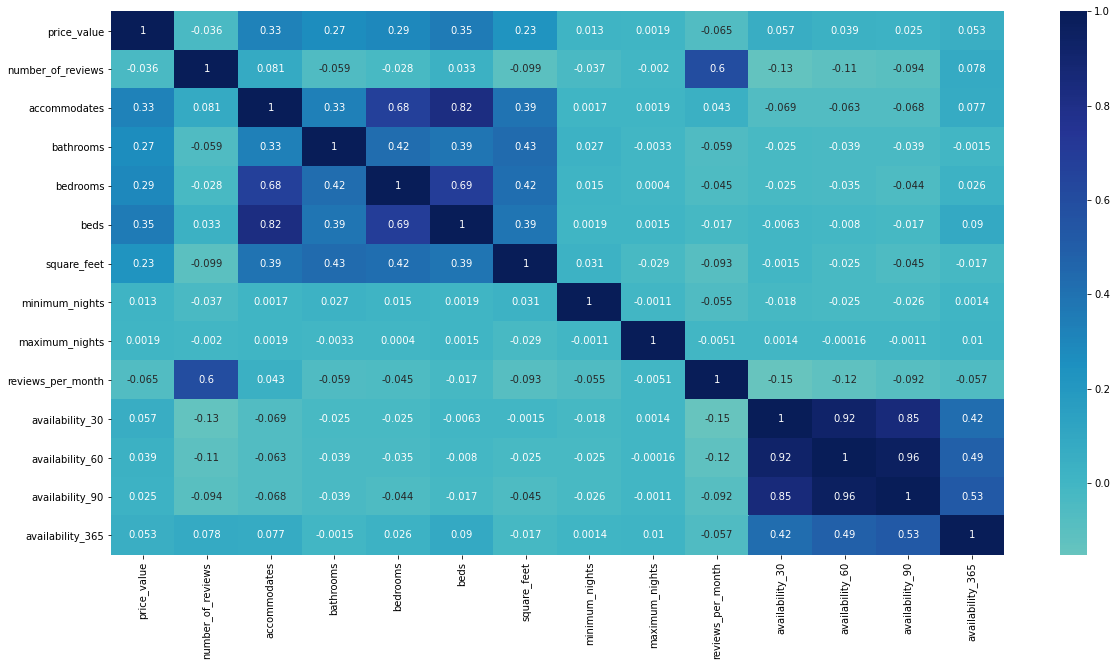

In [22]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.heatmap(df_temp_extra.corr(), annot=True, center=0, cmap="YlGnBu")

* Como si parecía por los apartados anteriores que la zona podría tener cierta relación con el precio, vamos a intentar dar un valor a cada vecindario, basado en los precios medios que calculamos por código postal.
* Para ello utilizamos el Dataframe del apartado anterior.
* Los pasos a seguir son:
    * Agrupamos por código postal.
    * Calculammos el valor medio por código postal
    * Ordenamos de menor a mayor precio.
    * Creamos una nueva columna númerica donde le daremos un valor. En este caso será el orden multiplicado por 10. Tendrá mayor valor el úlimo que corresponde al cp con precio medio más alto
    * Con esto ya somos capaces de asignar un valor a la zoa, de tal forma que si el inmueble esta situado en una zona barata, tendrá menor valor que uno situado en una zona cara

In [23]:
df_temp_extra_neib_value=pd.DataFrame(df_cp_ok_price.groupby('zipcode').agg(
    {'price_value':[('mean_price_x_zipcode','mean')]})['price_value']['mean_price_x_zipcode'].sort_values())

df_temp_extra_neib_value['neighbourhood_value']=range(10,((df_temp_extra_neib_value['mean_price_x_zipcode'].count()*10)+1),10)
df_temp_extra_neib_value

,mean_price_x_zipcode,neighbourhood_value
zipcode,,
28058,18.000000,10
28021,28.918033,20
28044,29.700000,30
28018,29.837209,40
28024,30.818182,50
28047,32.119403,60
28048,33.000000,70
28032,33.757576,80
28053,36.333333,90


* Teniendo ya este dataframe con esta columna que relaciona el zipcode con un valor de **mercado** ,hacemos join con el dataframe del apartado anterior donde teniamos el precio de forma númerica

In [24]:
temp1=df_cp_ok_price[['id','zipcode','name','price','price_value']]
temp1=temp1.set_index('zipcode')
temp2=df_temp_extra_neib_value[['mean_price_x_zipcode','neighbourhood_value']]
temp3=pd.merge(temp1, temp2, how='inner',left_index=True, right_index=True)
temp3.corr()

,id,price_value,mean_price_x_zipcode,neighbourhood_value
id,1.000000,-0.013969,-0.017036,-0.039313
price_value,-0.013969,1.000000,0.190357,0.178182
mean_price_x_zipcode,-0.017036,0.190357,1.000000,0.936042
neighbourhood_value,-0.039313,0.178182,0.936042,1.000000


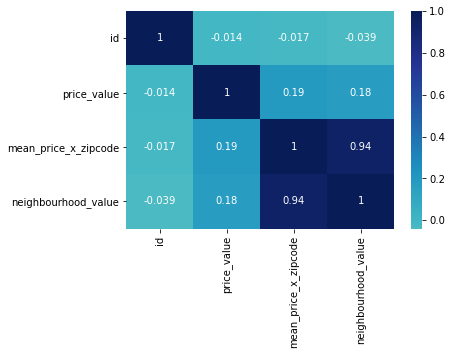

In [25]:
#fig, ax = plt.subplots(figsize=(20,10))
ax = sns.heatmap(temp3.corr(), annot=True, center=0, cmap="YlGnBu")

* Aquí observamos que la el valor de la zona **(neighbourhood_value)** si influye fuertemente en el precio medio por zona **(mean_price_x_zipcode)** ya que el coeficiente de correlación de Pearson es **> 0,9**

## Conclusiones

* ¿Qué opinas de AirBnB en Madrid?

* Mi opinión sobre AirBnB en Madrid es que es un dataset, que tiene:
<br>

    * Información con mucho ruido y que para explotarla necesita mucho trabajo de preprocesamiento.
    * No solo en posibles campos que estén a NaN sino en campos de información como el zipcode presenta mucho ruido, con texto libre y formato abierto, cuando debería ser claramente un formato cerrrado y bien acotado.
    * Aunque son inmuebles de Madrid y España aparecen algún caso detectado como que el país es Cuba y códigos postales que no son de Madrid. Por lo que da a entender poco control en la generación de los datos.
    * Campos sensibles como lo rlacionado con las licencias, solo hay realmente 249 que tienen algo cumplimentado, quedando más de 13 mil sin información pese a que tienen un indicador como que es necesaria.
    * Por lo que además del ruido de los datos, se observa poca relación entre columnas que su contenido debería esta bastante relacionado, como country, city, zipcode incluso longitud y latitud.